In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
path=("C:/Users/tandrima/breast cancer/dataset/IDC_regular_ps50_idx5/")
print(os.listdir(path))
print(len(os.listdir(path)))

['10253', '10254', '10255', '10256', '10257', '10258', '10259', '10260', '10261', '10262', '10264', '10268', '10269', '10272', '10273', '10274', '10275', '10276', '10277', '10278', '10279', '10282', '10285', '10286', '10288', '10290', '10291', '10292', '10293', '10295', '10299', '10300', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '12241', '12242', '12626', '12748', '12749', '12750', '12751', '12752', '12810', '12811', '12817', '12818', '12819', '12820', '12821', '12822', '12823', '12824', '12826', '12867', '12868', '12869', '12870', '12871', '12872', '12873', '12875', '12876', '12877', '12878', '12879', '12880', '12881', '12882', '12883', '12884', '12886', '12890', '12891', '12892', '12893', '12894', '12895', '12896', '12897', '12898', '12900', '12901', '12905', '12906', '12907', '12908', '12909', '12910', '12911', '12929', '12930', '12931', '12932', '12933', '12934', '12935', '12947', '12948', '12949', '12951', '12954', '12955', '13018', '13019', '13020', 

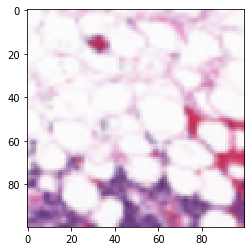

In [3]:
#path=("C:/Users/tandrima/breast cancer/dataset/IDC_regular_ps50_idx5/10253/1/10253_idx5_x501_y351_class1.png")
img = cv2.imread(f"C:/Users/tandrima/breast cancer/dataset/IDC_regular_ps50_idx5/10253/1/10253_idx5_x651_y251_class1.png")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (100,100))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

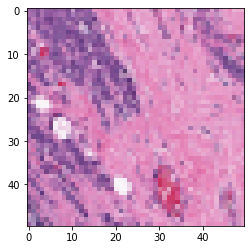

In [4]:
path=("C:/Users/tandrima/breast cancer/dataset/IDC_regular_ps50_idx5/10253/1/")
#print(os.listdir(path))
for image in os.listdir(path):
    img = cv2.imread(f"C:/Users/tandrima/breast cancer/dataset/IDC_regular_ps50_idx5/10253/1/{image}")
    #img=cv2.resize(img,(100,100))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
positive = []
negative = []

In [6]:
files= os.listdir ("C:/Users/tandrima/breast cancer/dataset/IDC_regular_ps50_idx5") # get all files' and folders' names in the current directory

id = []

for filename in files: # loop through all the files and folders

    if os.path.isdir(os.path.join(os.path.abspath("C:/Users/tandrima/breast cancer/dataset/IDC_regular_ps50_idx5/"), filename)): # check whether the current object is a folder or not

        id.append(filename)


In [7]:
print(len(id))

279


In [11]:
base_path = 'C:/Users/tandrima/breast cancer/dataset/IDC_regular_ps50_idx5/'
patient_ids = os.listdir(base_path)

In [12]:
class_0_total = 0
class_1_total = 0
from pprint import pprint
for patient_id in patient_ids:
    class_0_files = os.listdir(base_path + patient_id + '/0')
    class_1_files = os.listdir(base_path + patient_id + '/1')

    class_0_total += len(class_0_files)
    class_1_total += len(class_1_files) 

total_images = class_0_total + class_1_total
    
print(f'Number of patches in Class 0: {class_0_total}')
print(f'Number of patches in Class 1: {class_1_total}')
print(f'Total number of patches: {total_images}')

Number of patches in Class 0: 198738
Number of patches in Class 1: 78786
Total number of patches: 277524


In [15]:
columns = ["patient_id",'x','y',"target","path"]
data_rows = []
i = 0
iss = 0
isss = 0

# note that we loop through the classes after looping through the 
# patient ids so that we avoid splitting our data into [all class 0 then all class 1]
for patient_id in patient_ids:
    for c in [0,1]:
        class_path = base_path + patient_id + '/' + str(c) + '/'
        imgs = os.listdir(class_path)
        
        # Extracting Image Paths
        img_paths = [class_path + img + '/' for img in imgs]
        
        # Extracting Image Coordinates
        img_coords = [img.split('_',4)[2:4] for img in imgs]
        x_coords = [int(coords[0][1:]) for coords in img_coords]
        y_coords = [int(coords[1][1:]) for coords in img_coords]

        for (path,x,y) in zip(img_paths,x_coords,y_coords):
            values = [patient_id,x,y,c,path]
            data_rows.append({k:v for (k,v) in zip(columns,values)})
# We create a new dataframe using the list of dicts that we generated above
data = pd.DataFrame(data_rows)
print(data.shape)
data.head()

(277524, 5)


,patient_id,x,y,target,path
0,10253,1001,1001,0,C:/Users/tandrima/breast cancer/dataset/IDC_re...
1,10253,1001,1051,0,C:/Users/tandrima/breast cancer/dataset/IDC_re...
2,10253,1001,1101,0,C:/Users/tandrima/breast cancer/dataset/IDC_re...
3,10253,1001,1151,0,C:/Users/tandrima/breast cancer/dataset/IDC_re...
4,10253,1001,1201,0,C:/Users/tandrima/breast cancer/dataset/IDC_re...


In [30]:
positive_tissue = np.random.choice(data[data.target==1].index.values, size=100, replace=False)
negative_tissue = np.random.choice(data[data.target==0].index.values, size=100, replace=False)

n_rows = 10
n_cols = 10


In [26]:
from skimage import io

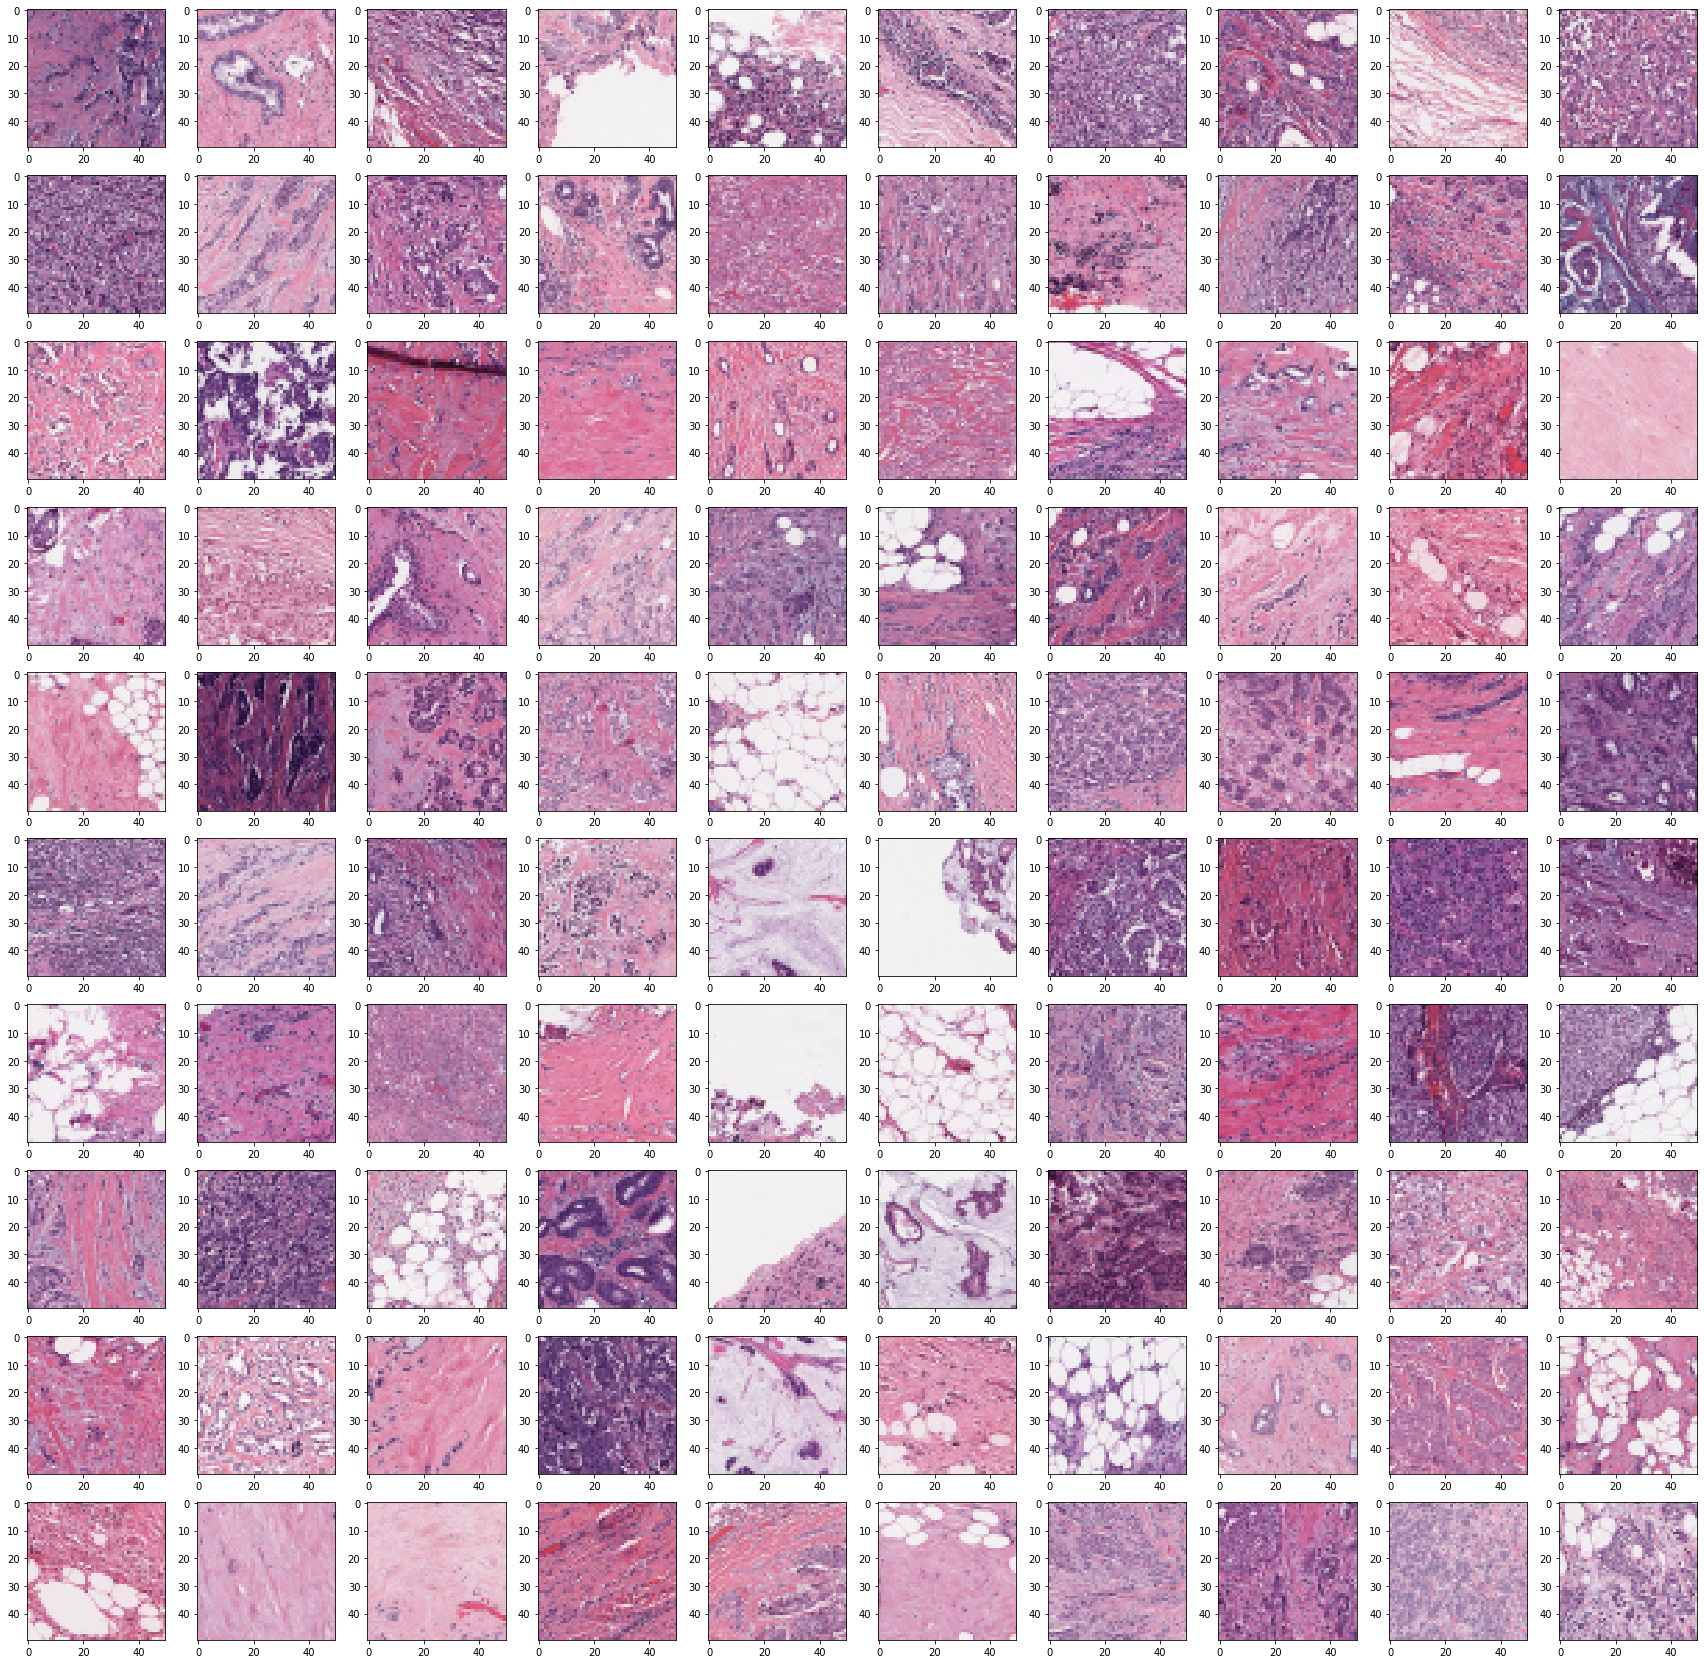

In [27]:
fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,30))

for row in range(n_rows):
    for col in range(n_cols):
        
        idx = positive_tissue[col + n_cols*row]
        img = io.imread(data.loc[idx, "path"])
        ax[row,col].imshow(img[:,:,:])
        #ax[row,col].grid(False)

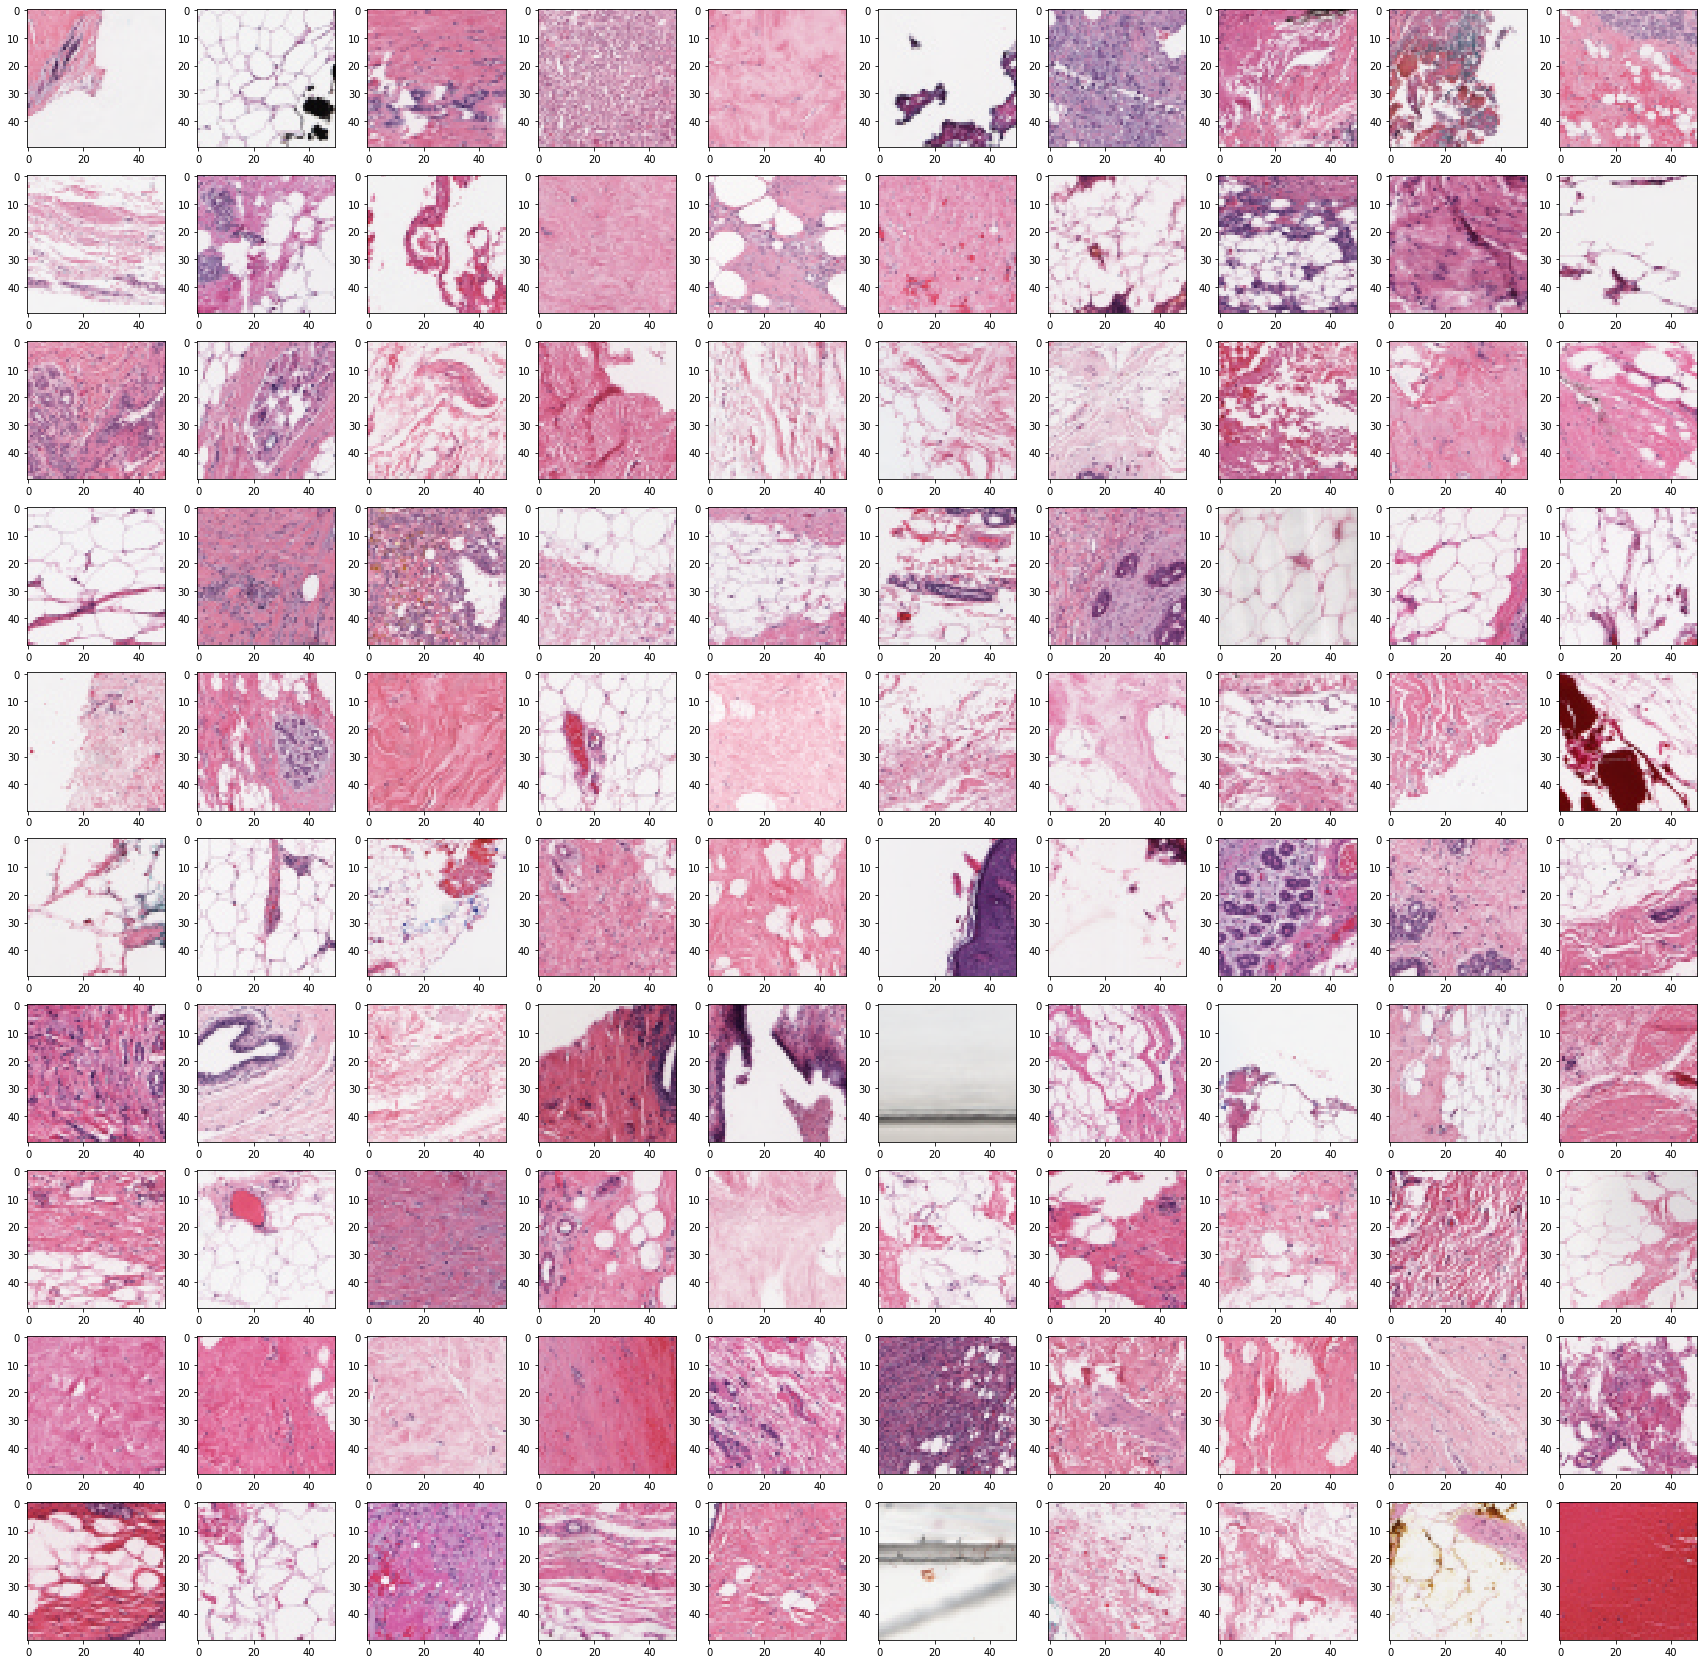

In [31]:
fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,30))

for row in range(n_rows):
    for col in range(n_cols):
        
        idx = negative_tissue[col + n_cols*row]
        img = io.imread(data.loc[idx, "path"])
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)